# Plot non-dimensional velocity profile $y^+$ vs $u^+$

In [15]:
%matplotlib inline
#%matplotlib qt


In [16]:
#Load libraries

import numpy as np
import matplotlib.pyplot as plt


In [17]:
#Load data using numpy

#Sweep mesh coarse
data1 = np.loadtxt('l10',skiprows=4)

#Unstructured mesh coarse
data2 = np.loadtxt('l10uns',skiprows=4)

#Sweep mesh finer
data3 = np.loadtxt('l10fine',skiprows=4)


In [18]:
#Sweep mesh coarse

#Find mid point of data and get maximum value of velocity U

#mid1=int(len(data1)/2)-1
#maxU=max(data1[0:mid1,1])

maxU=max(data1[:,1])
pos_maxU = np.where(data1[:,1] == max(data1[:,1]))

#Pos_maxU is a tuple
#type(pos_maxU)
mid=pos_maxU[0][0]

print('Maximum velocity = ',maxU)
print('Array position of maximum velocity = ',mid)


Maximum velocity =  1.15319
Array position of maximum velocity =  40


In [19]:
#Unstructured mesh coarse

#Find mid point of data and get maximum value of velocity U

maxUuns=max(data2[:,1])
pos_maxUuns = np.where(data2[:,1] == max(data2[:,1]))

#Pos_maxU is a tuple
#type(pos_maxU)
miduns=pos_maxUuns[0][0]

print('Maximum velocity = ',maxUuns)
print('Array position of maximum velocity = ',miduns)


Maximum velocity =  1.17501
Array position of maximum velocity =  46


In [20]:
#Sweep mesh finer

#Find mid point of data and get maximum value of velocity U

maxUfine=max(data3[:,1])
pos_maxUfine = np.where(data3[:,1] == max(data3[:,1]))

#Pos_maxU is a tuple
#type(pos_maxU)
midfine=pos_maxUfine[0][0]

print('Maximum velocity = ',maxUfine)
print('Array position of maximum velocity = ',midfine)


Maximum velocity =  1.15986
Array position of maximum velocity =  45


## Powerlaw correlation 
<br>
We will compare the numerical solution with the following correlation for turbulent profiles in pipes,
<br>
<br>
<font size="5"> $U_{max} \times \left( 1 - \frac{r}{R}^{1/n}    \right)$ </font>

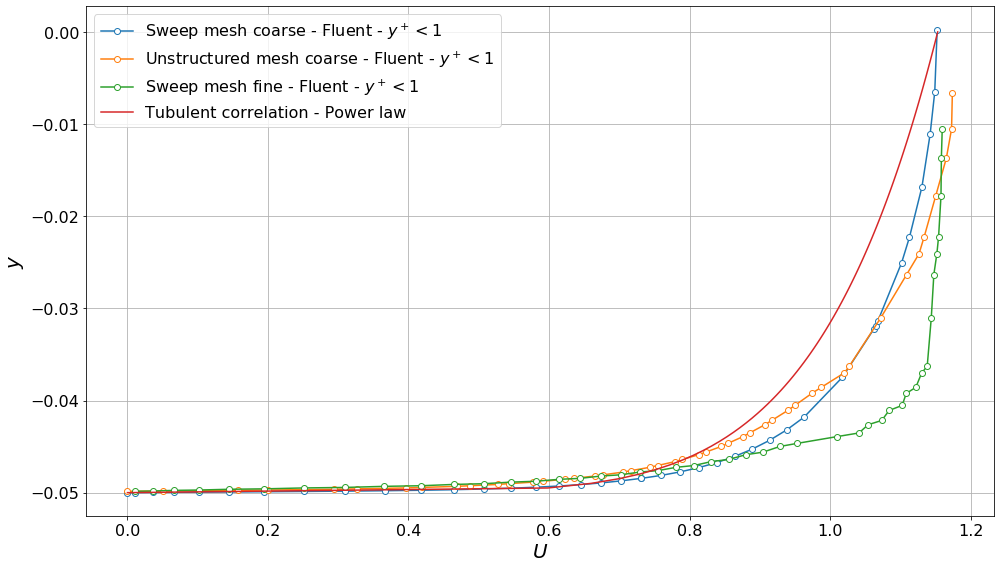

In [21]:
#Plot profiles

plt.figure(figsize=(14, 8))



#Fluent solution
#plt.plot(data1[0:mid,1],abs(data1[0:mid,0]-data1[0,0]),'-o',ms=6,label='Fluent - $y^+ < 1$',markerfacecolor='white',zorder=8)
plt.plot(data1[0:mid,1],data1[0:mid,0],'-o',ms=6,label='Sweep mesh coarse - Fluent - $y^+ < 1$',markerfacecolor='white',zorder=8)

plt.plot(data2[0:miduns,1],data2[0:miduns,0],'-o',ms=6,label='Unstructured mesh coarse - Fluent - $y^+ < 1$',markerfacecolor='white',zorder=8)

plt.plot(data3[0:midfine,1],data2[0:midfine,0],'-o',ms=6,label='Sweep mesh fine - Fluent - $y^+ < 1$',markerfacecolor='white',zorder=8)


#Power law correlation Umax*(1-r/R)^(1/n)
#The exponent n depends on Re
x=np.linspace(0.0,0.05,100)
plt.plot (maxU*(1-x/0.05)**(1./7.),-x,label= "Tubulent correlation - Power law",zorder=10)


plt.grid()

plt.tick_params(labelsize=16)
plt.legend(loc=0,fontsize=16)

plt.xlabel('$U$', fontsize=20)
plt.ylabel('$y$', fontsize=20)

plt.tight_layout()

#plt.savefig("fig1.png")


## Theoretical profiles
<br>
Log-law layer
<br>
<br>

<font size="5"> $u^+ = \frac{1}{\kappa} \text{ln} y^+ + C^+$ </font>

<br>
<br>

Viscous sublayer

<font size="5"> $u^+ =  y^+ $ </font>


In [22]:
#Compute theoretical profiles
x=np.linspace(0.1,100000,1000000)
yp=x

#Laminar sublayer
upl=yp

#Low-law layer
upt=(1.0/0.41)*np.log(yp)+5.0


#Compute therorical profiles with limit on values
x1=np.linspace(0.1,20,10000)
x2=np.linspace(5,100000,10000)

ypl1=x1
ypt1=x2

#Laminar sublayer
upl1=ypl1

#Low-law layer
upt1=(1.0/0.41)*np.log(ypt1)+5.0


## Spalding's law
<br>
The most widely known “universal” velocity profile is Spalding’s law [1], which is essentially a fit of the laminar, buffer and logarithmic regions of the boundary layer, 
<br>
<br>

<font size="5"> $y^+ = u^+ + \frac{1}{E} \left[e^{\kappa u^+} - 1 - \frac{\kappa u^+}{1!} - \frac{ \left( \kappa u^+ \right)^2}{2!} - \frac{ \left( \kappa u^+ \right)^3}{3!} - \frac{ \left( \kappa u^+ \right)^4}{4!} \right]$ </font>

<br>
<br>

[1] Spalding. A single formula for the law of the wall. J. of Applied Mechanics. 1961.

In [23]:
#Spalding universal law

up_s = np.linspace(0,30,10000)

#E = 9.025
#k = 0.4
#B = 5.5

E = 9.1
k = 0.42

#E = 8.6
#k = 0.417
    
yp_s = up_s + (1/E)*( np.exp(k*up_s) - 1 - (k*up_s) - ((k*up_s)**2)/2  - ((k*up_s)**3)/6 - ((k*up_s)**4)/24 )


In [24]:
#Global properties

U=1
rho=1

mu=1.e-6
nu=mu/rho


In [25]:
#Sweep mesh coarse
#Compute y+ and u+ from numerical solution

ws=0.00226424
#ws=0.002

utau = np.sqrt(ws/rho)

#ypn = utau*0.8*(abs(data1[0:mid,0]-data1[0,0]))/nu
#ypn = utau*(abs(data1[0:mid,0]-data1[0,0]))/nu
#upn = data1[0:mid,1]/utau

ypn = utau*(abs(data1[:,0]-data1[0,0]))/nu
upn = data1[:,1]/utau


In [26]:
#Unstructured mesh
#Compute y+ and u+ from numerical solution

wsuns=0.00177064

utauuns = np.sqrt(wsuns/rho)

ypnuns = utauuns*(abs(data2[:,0]-data2[0,0]))/nu
upnuns = data2[:,1]/utauuns


In [27]:
#Sweep mesh fine
#Compute y+ and u+ from numerical solution

wsfine=0.002263

utaufine = np.sqrt(wsfine/rho)

ypnfine = utaufine*(abs(data3[:,0]-data3[0,0]))/nu
upnfine = data3[:,1]/utaufine


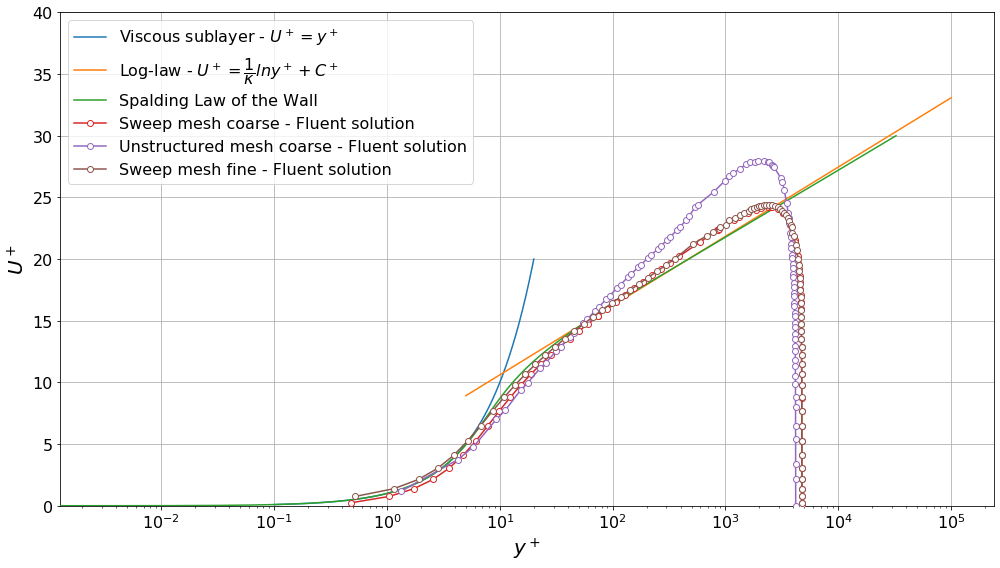

In [28]:
#Plot profiles

plt.figure(figsize=(14, 8))

#Correlations
#plt.plot(yp,upl,label='Viscous sublayer - $U^+=y^+$')
#plt.plot(yp,upt,label='Log-law - $U^+ = \dfrac{1}{\kappa} ln y^+ + C^+$')

plt.plot(ypl1,upl1,label='Viscous sublayer - $U^+=y^+$')
plt.plot(ypt1,upt1,label='Log-law - $U^+ = \dfrac{1}{\kappa} ln y^+ + C^+$')

plt.plot(yp_s,up_s,'-',label='Spalding Law of the Wall',markerfacecolor='white',markevery=300,zorder=10)


#FLUENT solution
plt.plot(ypn[1:],upn[1:],'-o',ms=6,label='Sweep mesh coarse - Fluent solution',markerfacecolor='white',zorder=20)
plt.plot(ypnuns[1:],upnuns[1:],'-o',ms=6,label='Unstructured mesh coarse - Fluent solution',markerfacecolor='white',zorder=20)
plt.plot(ypnfine[1:],upnfine[1:],'-o',ms=6,label='Sweep mesh fine - Fluent solution',markerfacecolor='white',zorder=20)

plt.xscale('log')
#plt.xlim(0,10000)
plt.ylim(0,40)

plt.grid()

plt.tick_params(labelsize=16)
plt.legend(loc=0,fontsize=16)

plt.xlabel('$y^+$', fontsize=20)
plt.ylabel('$U^+$', fontsize=20)
plt.tight_layout()

#plt.savefig("fig2.png")


In [29]:
import sys
print('Python version:', sys.version_info)

import IPython
print('IPython version:', IPython.__version__)

import numpy
print('Numpy version', numpy.__version__)

import matplotlib
print('Matplotlib version:', matplotlib.__version__)


Python version: sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0)
IPython version: 7.12.0
Numpy version 1.18.1
Matplotlib version: 3.1.3
